# Praktikum 7.1 - Contrast Enhancment

Untuk melakukan perbaikan contrast pada suatu citra terdapat beberapa metode, diantaranya :
1. Histogram Equalization [1], [3]
2. Contrast Limited Adaptive Histogram Equalization (CLAHE) [1], [2], [3]
3. Min-Max Contrast Stretching [1]
4. Perkalian Konstanta

Sumber : 
1. https://iq.opengenus.org/contrast-enhancement-algorithms/
2. https://www.mathworks.com/help/images/ref/adapthisteq.html
3. https://towardsdatascience.com/histogram-equalization-5d1013626e64

## Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

## Read Image

In [2]:
image = data.camera()

## Penerapan Histogram Equalization (HE)

In [3]:
image_equalized = cv2.equalizeHist(image)

## Penerapan Metode Contrast Limited Adaptive Histogram Equalization (CLAHE)

In [4]:
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8))

#Apply CLAHE to the original image
image_clahe = clahe.apply(image)

## Penerapan metode Contrast Stretching (CS)

In [5]:
# Create an empty array to store the final output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# Apply Min-Max Contrasting
min = np.min(image)
max = np.max(image)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

## Penerapan Metode Perkalian Konstanta

In [10]:
copyCamera = image.copy().astype(float)

m1,n1 = copyCamera.shape
output1 = np.empty([m1, n1])

for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

## Plot Image

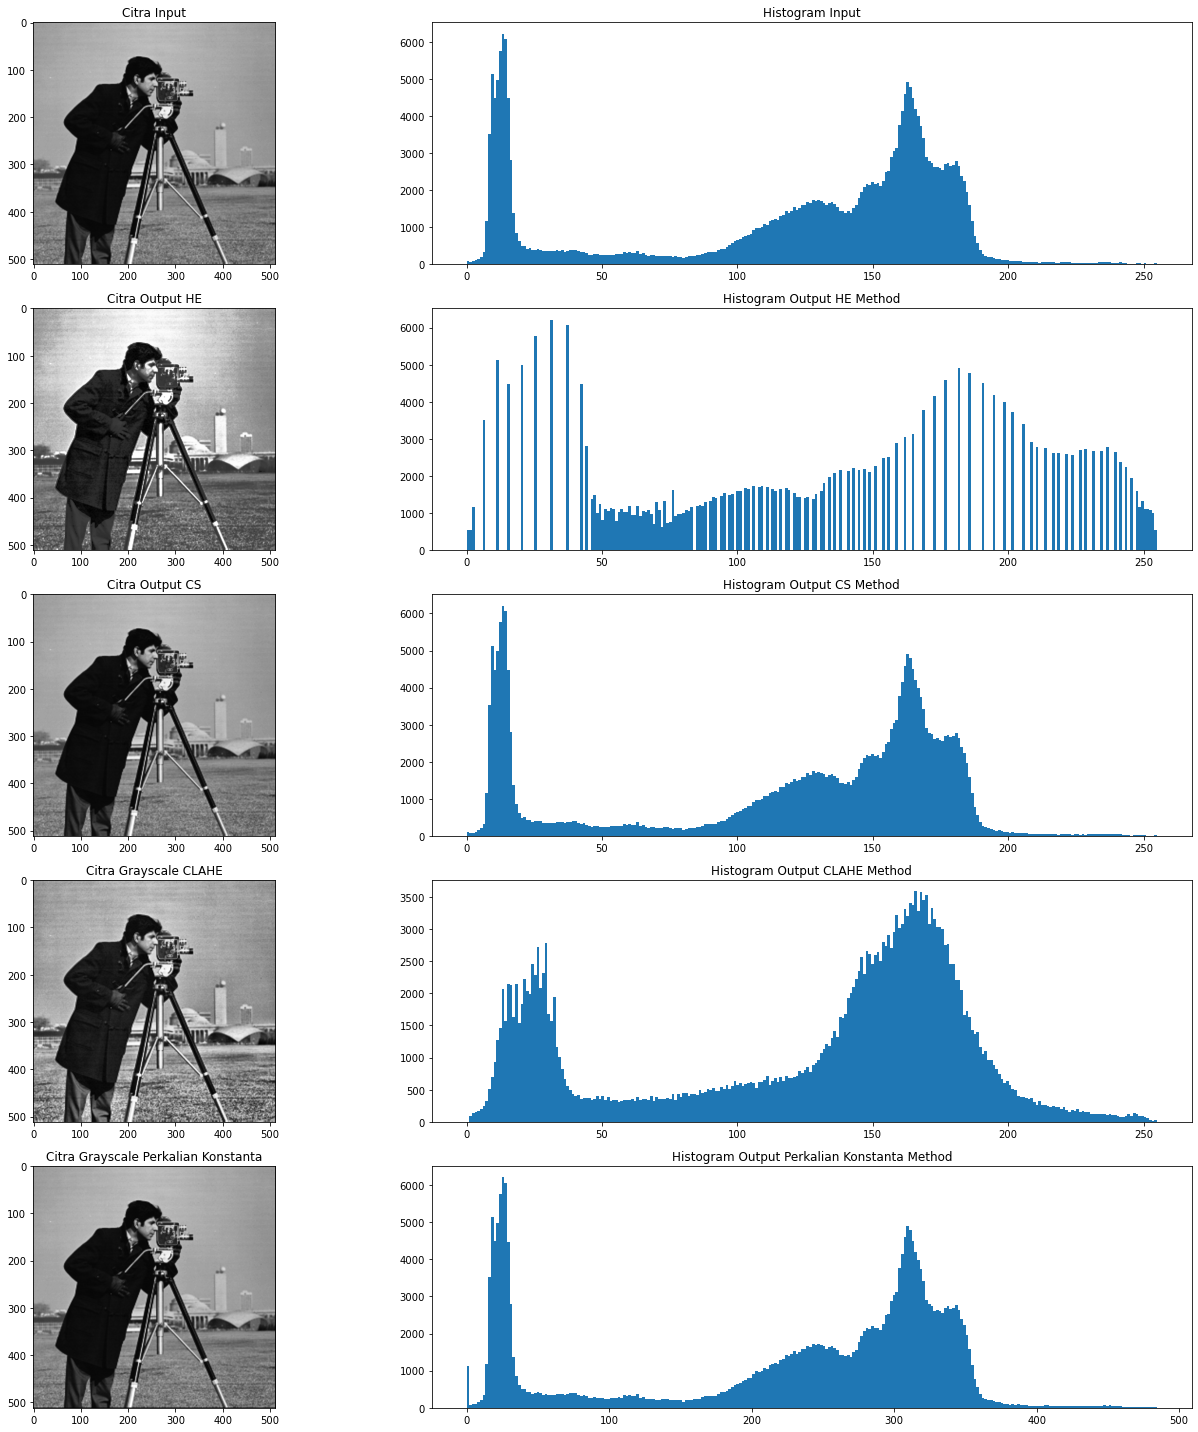

In [11]:
fig, axes = plt.subplots(5, 2, figsize=(20, 20))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title("Citra Input")
ax[1].hist(image.ravel(), bins=256)
ax[1].set_title('Histogram Input')

ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()